In [218]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.model_selection import learning_curve
%matplotlib inline

with open('all_top40.pkl', 'rb') as picklefile:
    df2 = pickle.load(picklefile)

In [371]:
under_100 = df2[df2['Salary'] < 500000]

In [372]:
under_100

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
Gordon Beckham,314.0,104.285714,366.285714,330.571429,38.857143,76.714286,17.142857,0.285714,7.285714,31.857143,...,5.285714,3.142857,0.242857,100000.0,0.014691,30,0.0,730,SEA,4
Jeremy Hellickson,395.0,13.500000,26.833333,22.333333,1.166667,3.666667,0.333333,0.166667,0.000000,2.166667,...,0.333333,0.166667,0.000000,100000.0,0.014691,30,0.0,81,WSN,1
Matt Albers,563.0,19.400000,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,200000.0,0.029382,34,0.0,97,MIL,1
Oliver Perez,645.0,37.333333,0.500000,0.500000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.016667,100000.0,0.014691,35,0.0,224,CLE,1
Wade LeBlanc,804.0,17.833333,10.166667,8.666667,0.666667,2.000000,0.166667,0.000000,0.000000,0.333333,...,0.166667,0.000000,0.000000,50000.0,0.007346,32,0.0,107,SEA,1


In [367]:
df2['Salary'].describe()

count    5.960000e+02
mean     5.273218e+06
std      6.778023e+06
min      5.000000e+04
25%      5.700000e+05
50%      2.175000e+06
75%      7.108928e+06
max      3.557143e+07
Name: Salary, dtype: float64

In [219]:
## SET UP FINAL TRAIN/TEST

y = df2.Salary
X = df2.drop(['Salary'],1)
X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [220]:
df3 = X_train.copy(deep=True)

In [221]:
df3_y = pd.DataFrame(y_train)

In [222]:
df3_y.reset_index(inplace=True)

df3_y

,Player_Name,Salary
0,Ian Kinsler,11000000.0
1,Enny Romero,565000.0
2,DJ LeMahieu,8500000.0
3,Hector Neris,582500.0
4,Cameron Maybin,3250000.0
5,Ian Kennedy,16000000.0
6,Manny Machado,16000000.0
7,Carlos Asuaje,550100.0
8,Ozzie Albies,555000.0
9,Tyler Clippard,1500000.0


In [223]:
## CREATE FULL TRAINING DATASET

df3.reset_index(inplace=True)

df3 = pd.merge(df3, df3_y)

df3 = df3.set_index('Player_Name')

In [224]:
df3

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,338.0,150.714286,680.142857,613.857143,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,...,7.714286,3.857143,1.771429,1.616014,35,2.0,1055,LAA,4,11000000.0
Enny Romero,283.0,27.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083004,26,0.0,55,TOT,1,565000.0
DJ LeMahieu,210.0,118.142857,459.714286,416.000000,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,...,1.857143,2.857143,1.085714,1.248738,28,2.0,827,COL,4,8500000.0
Hector Neris,332.0,44.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.085575,28,0.0,176,PHI,1,582500.0
Cameron Maybin,139.0,106.000000,407.714286,367.714286,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,...,2.000000,1.571429,0.100000,0.477459,30,0.0,742,MIA,7,3250000.0
Ian Kennedy,337.0,22.285714,47.142857,37.857143,2.000000,4.285714,1.428571,0.142857,0.142857,2.285714,...,0.142857,0.142857,0.000000,2.350566,32,0.0,156,KCR,1,16000000.0
Manny Machado,545.0,127.333333,560.833333,514.666667,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,...,2.166667,4.000000,1.900000,2.350566,24,3.0,764,BAL,6,16000000.0
Carlos Asuaje,141.0,48.000000,184.000000,165.500000,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,...,1.000000,0.500000,-0.100000,0.080815,25,0.0,96,SDP,4,550100.0
Ozzie Albies,648.0,57.000000,244.000000,217.000000,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,...,3.000000,2.000000,0.200000,0.081535,20,0.0,57,ATL,4,555000.0


In [225]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, Ian Kinsler to Pat Valaika
Data columns (total 28 columns):
index                 417 non-null float64
Games_Played          417 non-null float64
Plate_Appearances     417 non-null float64
At_Bats               417 non-null float64
Runs                  417 non-null float64
Hits                  417 non-null float64
2B                    417 non-null float64
3B                    417 non-null float64
HR                    417 non-null float64
RBI                   417 non-null float64
BA                    417 non-null float64
OBP                   417 non-null float64
SLG                   417 non-null float64
OPS                   417 non-null float64
SB                    417 non-null float64
BB                    417 non-null float64
SO                    417 non-null float64
TB                    417 non-null float64
HBP                   417 non-null float64
SF                    417 non-null float64
dWAR                  

In [226]:
df3.corr()

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,SO,TB,HBP,SF,dWAR,Adj_Salary,Age,All_star_count,Total_games_played,Salary
index,1.000000,0.021166,0.011513,0.014729,0.002103,0.019326,0.021630,-0.087778,0.065591,0.042663,...,0.023282,0.029733,-0.042687,-0.011082,-0.049634,0.053603,-0.002705,0.043827,-0.003620,0.053603
Games_Played,0.021166,1.000000,0.967251,0.966828,0.948969,0.957054,0.944076,0.713305,0.833827,0.925193,...,0.895772,0.953013,0.708813,0.875832,0.161744,0.291223,0.170716,0.319854,0.893759,0.291223
Plate_Appearances,0.011513,0.967251,1.000000,0.999090,0.985611,0.992336,0.978174,0.734673,0.868468,0.960160,...,0.920526,0.988989,0.720911,0.910531,0.163823,0.338072,0.143447,0.350123,0.874352,0.338072
At_Bats,0.014729,0.966828,0.999090,1.000000,0.982385,0.993736,0.978071,0.742432,0.861588,0.956878,...,0.916495,0.988148,0.713454,0.908585,0.171682,0.332607,0.137799,0.345537,0.871489,0.332607
Runs,0.002103,0.948969,0.985611,0.982385,1.000000,0.981584,0.970186,0.747518,0.887012,0.958335,...,0.918944,0.987223,0.713218,0.893648,0.143538,0.334770,0.129881,0.361120,0.847897,0.334770
Hits,0.019326,0.957054,0.992336,0.993736,0.981584,1.000000,0.982504,0.740627,0.847933,0.953735,...,0.885862,0.988544,0.697727,0.914613,0.168082,0.353610,0.145997,0.374359,0.869216,0.353610
2B,0.021630,0.944076,0.978174,0.978071,0.970186,0.982504,1.000000,0.701902,0.858354,0.954997,...,0.880875,0.981742,0.693801,0.914516,0.165011,0.346699,0.141274,0.372843,0.852202,0.346699
3B,-0.087778,0.713305,0.734673,0.742432,0.747518,0.740627,0.701902,1.000000,0.514369,0.627228,...,0.679339,0.712776,0.505471,0.634669,0.230753,0.112021,-0.006726,0.128401,0.577505,0.112021
HR,0.065591,0.833827,0.868468,0.861588,0.887012,0.847933,0.858354,0.514369,1.000000,0.954285,...,0.898889,0.916706,0.643578,0.804894,-0.030734,0.329350,0.098555,0.366067,0.729019,0.329350
RBI,0.042663,0.925193,0.960160,0.956878,0.958335,0.953735,0.954997,0.627228,0.954285,1.000000,...,0.910963,0.983355,0.684293,0.910148,0.069010,0.370304,0.144097,0.392012,0.834829,0.370304


In [227]:
X=patsy.dmatrix('Pos',data=df3,return_type='dataframe')
X.head()

,Intercept,Pos[T.2],Pos[T.3],Pos[T.4],Pos[T.5],Pos[T.6],Pos[T.7],Pos[T.8],Pos[T.9],Pos[T.D]
Player_Name,,,,,,,,,,
Ian Kinsler,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Enny Romero,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DJ LeMahieu,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Hector Neris,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cameron Maybin,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [228]:
df3=df3.join(X)

In [229]:
df3['Catcher'] = df3['Pos[T.2]']
df3['First_Base'] = df3['Pos[T.3]']
df3['Second_Base'] = df3['Pos[T.4]']
df3['Third_Base'] = df3['Pos[T.5]']
df3['Shortstop'] = df3['Pos[T.6]']
df3['Left_Field'] = df3['Pos[T.7]']
df3['Center_Field'] = df3['Pos[T.8]']
df3['Right_Field'] = df3['Pos[T.9]']
df3['DH'] = df3['Pos[T.D]']

df3 = df3.drop(['Pos[T.2]','Pos[T.3]','Pos[T.4]','Pos[T.5]','Pos[T.6]','Pos[T.7]','Pos[T.8]','Pos[T.9]','Pos[T.D]'],1)

df3

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,Intercept,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,338.0,150.714286,680.142857,613.857143,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Enny Romero,283.0,27.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DJ LeMahieu,210.0,118.142857,459.714286,416.000000,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Hector Neris,332.0,44.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cameron Maybin,139.0,106.000000,407.714286,367.714286,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Ian Kennedy,337.0,22.285714,47.142857,37.857143,2.000000,4.285714,1.428571,0.142857,0.142857,2.285714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Manny Machado,545.0,127.333333,560.833333,514.666667,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Carlos Asuaje,141.0,48.000000,184.000000,165.500000,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ozzie Albies,648.0,57.000000,244.000000,217.000000,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
batters_only = df3[df3['Pos'] != '1']

In [231]:
batters_only = batters_only.rename(index=str, columns={"2B": "Doubles", "3B": "Triples"})

In [232]:
batters_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, Ian Kinsler to Pat Valaika
Data columns (total 38 columns):
index                 241 non-null float64
Games_Played          241 non-null float64
Plate_Appearances     241 non-null float64
At_Bats               241 non-null float64
Runs                  241 non-null float64
Hits                  241 non-null float64
Doubles               241 non-null float64
Triples               241 non-null float64
HR                    241 non-null float64
RBI                   241 non-null float64
BA                    241 non-null float64
OBP                   241 non-null float64
SLG                   241 non-null float64
OPS                   241 non-null float64
SB                    241 non-null float64
BB                    241 non-null float64
SO                    241 non-null float64
TB                    241 non-null float64
HBP                   241 non-null float64
SF                    241 non-null float64
dWAR                  

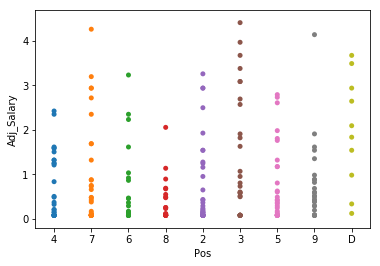

In [233]:
sns.stripplot(x="Pos", y="Adj_Salary", data=batters_only)

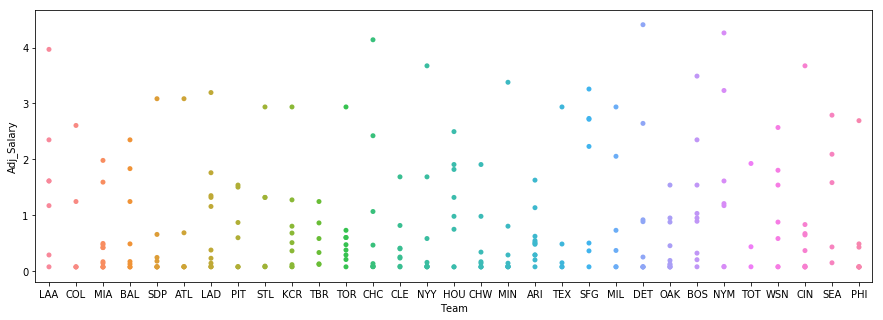

In [234]:
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="Team", y="Adj_Salary", data=batters_only, ax=ax)

In [235]:
salary_df = batters_only.sort_values(by='Salary', ascending=False)
salary_df[:10]

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,Intercept,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
Miguel Cabrera,599.0,148.000000,634.428571,550.428571,90.000000,176.571429,35.285714,0.571429,30.714286,104.857143,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yoenis Cespedes,829.0,131.333333,549.833333,503.166667,75.333333,138.000000,27.666667,4.000000,25.666667,82.500000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Jason Heyward,377.0,137.285714,554.142857,492.428571,69.000000,127.714286,24.428571,3.000000,13.857143,55.428571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Albert Pujols,34.0,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,98.285714,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Joey Votto,417.0,139.142857,610.142857,490.571429,85.000000,153.571429,33.000000,1.571429,23.857143,76.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Giancarlo Stanton,312.0,126.571429,532.000000,459.714286,75.857143,123.857143,25.857143,1.285714,35.000000,87.571429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
J.D. Martinez,342.0,110.285714,445.428571,404.000000,55.857143,115.000000,24.000000,1.857143,21.714286,68.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Joe Mauer,411.0,127.857143,548.428571,478.857143,63.857143,139.285714,28.571429,1.857143,8.000000,57.571429,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Buster Posey,134.0,132.000000,542.857143,478.428571,63.714286,148.142857,28.714286,0.857143,15.714286,75.285714,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','Catcher','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Team','Salary']]

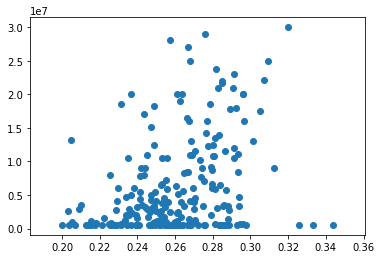

In [237]:
## Remove players below Mendoza line

batters_only_df = batters_only_df[batters_only_df['BA'] > 0.2]

plt.scatter(batters_only_df['BA'], batters_only_df['Salary'])

In [238]:
no_categorical = batters_only_df[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF', 'Salary',
                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count']]

In [239]:
from sklearn import preprocessing
normalized_categorical = preprocessing.normalize(no_categorical, axis=0)

In [240]:
normalized_categorical=pd.DataFrame(normalized_categorical,columns=no_categorical.columns)

In [364]:
batters_only_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Team,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,0.269097,0.333492,0.436634,0.770126,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,LAA,11000000.0
DJ LeMahieu,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,0.293349,0.338396,0.385015,0.723411,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,COL,8500000.0
Cameron Maybin,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,0.244065,0.311423,0.351670,0.663093,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MIA,3250000.0
Manny Machado,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,0.276974,0.323903,0.469102,0.793005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BAL,16000000.0
Carlos Asuaje,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,0.239346,0.287160,0.326615,0.613775,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,SDP,550100.0
Ozzie Albies,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,0.285714,0.353909,0.456221,0.810131,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ATL,555000.0
Kike Hernandez,27.000000,49.250000,12.500000,1.750000,7.000000,22.750000,0.240042,0.314306,0.414134,0.728440,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,LAD,1600000.0
Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,0.725587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PIT,10500000.0
Tommy Pham,37.250000,53.250000,9.000000,1.750000,9.250000,27.000000,0.200174,0.270495,0.359412,0.629907,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,STL,570100.0


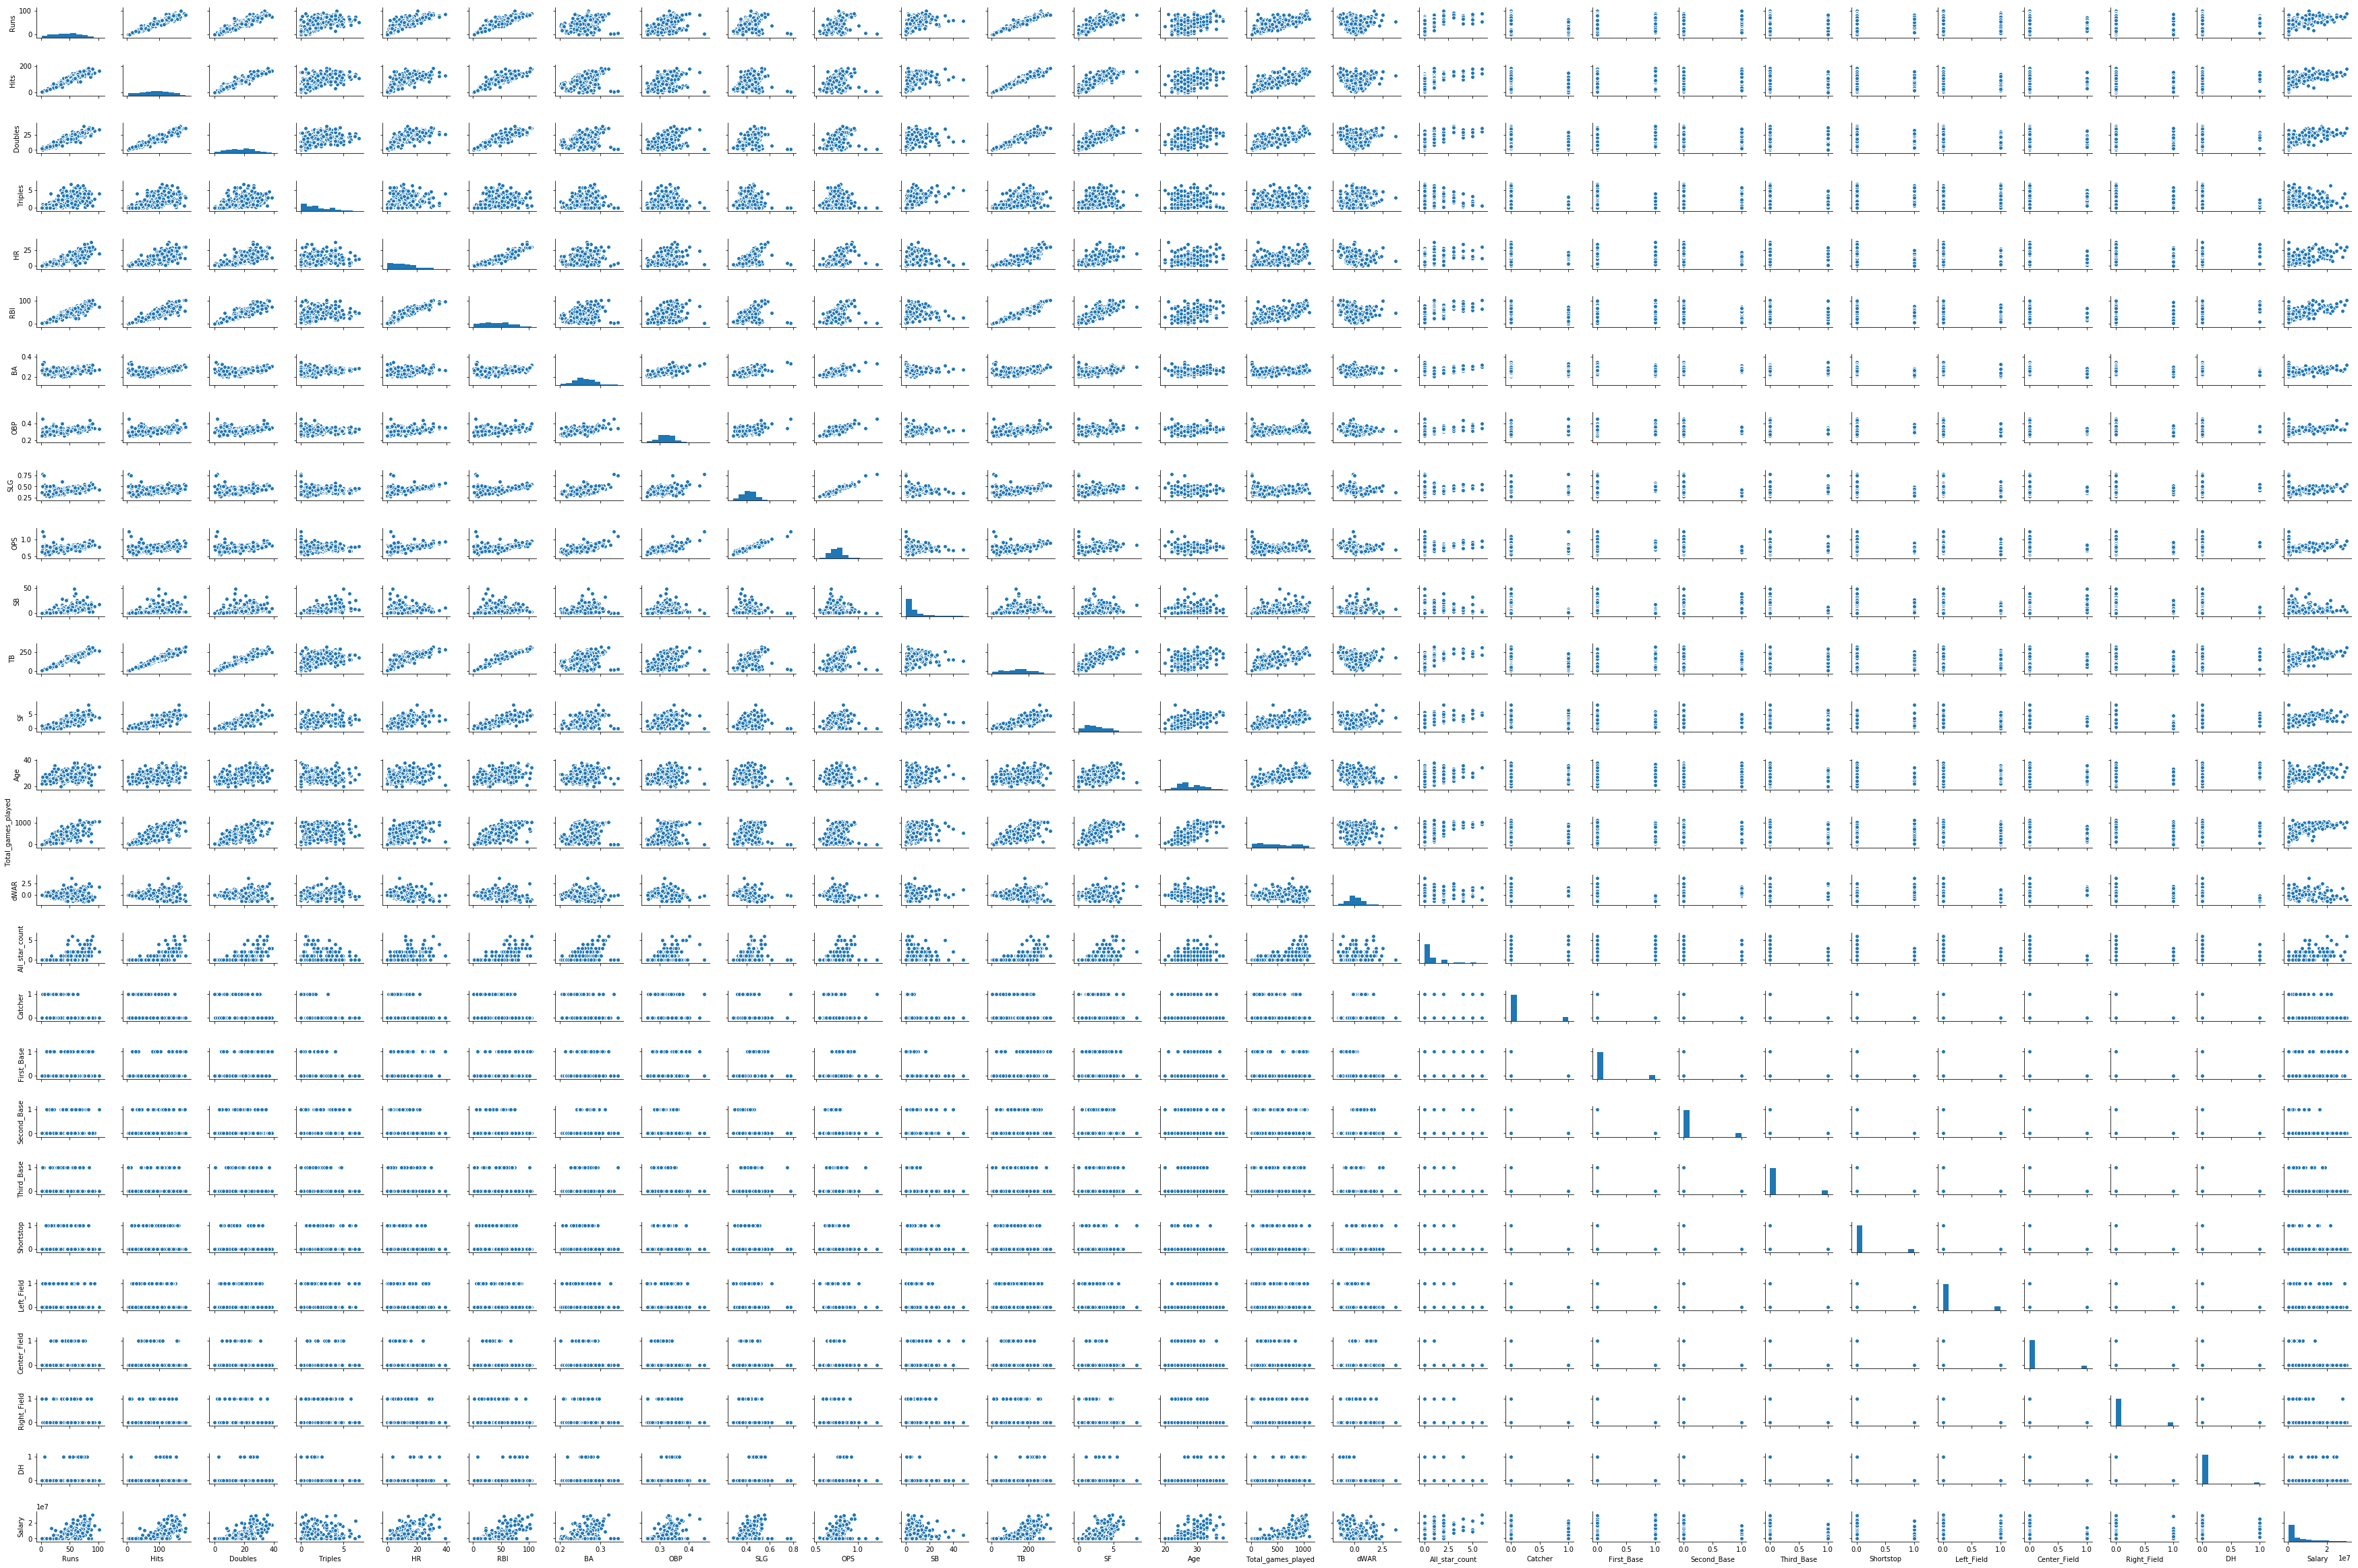

In [363]:
sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [242]:
no_categorical.reset_index(inplace=True)

In [243]:
normalized_categorical['Player_Name'] = no_categorical['Player_Name']

In [244]:
## NO ARIZONA FOR NOW

categorical_data = batters_only_df[['Catcher','First_Base','Second_Base','Third_Base','Shortstop',
                                    'Left_Field', 'Right_Field','Center_Field','DH','Team']]

categorical_data

,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Team
Player_Name,,,,,,,,,,
Ian Kinsler,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,LAA
DJ LeMahieu,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,COL
Cameron Maybin,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MIA
Manny Machado,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BAL
Carlos Asuaje,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,SDP
Ozzie Albies,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ATL
Kike Hernandez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,LAD
Francisco Cervelli,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PIT
Tommy Pham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,STL


In [245]:
categorical_data.reset_index(inplace=True)

In [246]:
norm_batters = pd.merge(normalized_categorical, categorical_data)

In [247]:
norm_batters = norm_batters.set_index('Player_Name')

In [248]:
norm_batters.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Salary', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'Catcher', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Right_Field', 'Center_Field', 'DH', 'Team'],
      dtype='object')

In [249]:
## FROM BEFORE!!1

#y = norm_batters.log_salary
#X = norm_batters.drop(['log_salary','Salary'],1)
#X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [250]:
salary_df = norm_batters.sort_values(by='Salary', ascending=False)
salary_df[:10]['Salary']

Player_Name
Miguel Cabrera       0.215491
Yoenis Cespedes      0.208308
Jason Heyward        0.202322
Albert Pujols        0.193942
Joey Votto           0.179576
Giancarlo Stanton    0.179576
J.D. Martinez        0.170597
Joe Mauer            0.165210
Buster Posey         0.159304
Jose Reyes           0.158027
Name: Salary, dtype: float64

In [251]:
training_df = norm_batters.copy(deep=True)

In [252]:
training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Team
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,0.133193,0.111931,0.112819,0.106501,0.095193,0.100086,0.068520,0.068197,0.067731,0.068090,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,LAA
DJ LeMahieu,0.076885,0.084963,0.062624,0.106501,0.022793,0.055134,0.074695,0.069200,0.059724,0.063960,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,COL
Cameron Maybin,0.069777,0.063892,0.052585,0.095484,0.028826,0.046489,0.062146,0.063684,0.054552,0.058627,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MIA
Manny Machado,0.095592,0.097207,0.098159,0.038561,0.107930,0.090993,0.070525,0.066237,0.072768,0.070113,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BAL
Carlos Asuaje,0.019642,0.029771,0.026771,0.012854,0.009385,0.015464,0.060944,0.058723,0.050665,0.054266,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,SDP
Ozzie Albies,0.044522,0.041950,0.030117,0.128536,0.028156,0.037652,0.072751,0.072373,0.070770,0.071627,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ATL
Kike Hernandez,0.035356,0.033323,0.041829,0.044988,0.032848,0.030593,0.061121,0.064274,0.064241,0.064404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,LAD
Francisco Cervelli,0.033111,0.036344,0.029639,0.033052,0.014748,0.028816,0.059819,0.077685,0.053625,0.064152,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PIT
Tommy Pham,0.048778,0.036030,0.030117,0.044988,0.043407,0.036308,0.050970,0.055315,0.055752,0.055692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,STL


In [253]:
training_df.describe()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,All_star_count,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,0.059432,0.059827,0.059380,0.051998,0.054280,0.058141,0.066203,0.066232,0.065720,0.066094,...,0.034173,0.137168,0.119469,0.123894,0.128319,0.115044,0.137168,0.110619,0.084071,0.044248
std,0.029943,0.029142,0.030046,0.041577,0.038536,0.032389,0.006489,0.006182,0.010303,0.007527,...,0.057197,0.344788,0.325060,0.330192,0.335187,0.319784,0.344788,0.314357,0.278110,0.206102
min,0.001309,0.002368,0.000000,0.000000,0.000000,0.001681,0.050970,0.052108,0.044253,0.047896,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034701,0.036593,0.034120,0.017138,0.021201,0.030929,0.061986,0.062367,0.059339,0.061304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.060330,0.061137,0.060234,0.044069,0.047395,0.056815,0.066170,0.066037,0.065443,0.066109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.081351,0.082595,0.081148,0.079876,0.078098,0.080491,0.071172,0.070072,0.071088,0.069803,...,0.046524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.133193,0.122805,0.129550,0.173524,0.183012,0.141004,0.087528,0.092952,0.120650,0.108954,...,0.279145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [254]:
training_df.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Salary', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'Catcher', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Right_Field', 'Center_Field', 'DH', 'Team'],
      dtype='object')

In [255]:
#y_train = pd.DataFrame(y_train)

In [256]:
#y_train.reset_index(inplace=True)

#y_train

In [257]:
## CREATE FULL TRAINING DATASET

#training_df.reset_index(inplace=True)

#training_df = pd.merge(training_df, y_train)

#training_df = training_df.set_index('Player_Name')

In [258]:
training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Team
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,0.133193,0.111931,0.112819,0.106501,0.095193,0.100086,0.068520,0.068197,0.067731,0.068090,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,LAA
DJ LeMahieu,0.076885,0.084963,0.062624,0.106501,0.022793,0.055134,0.074695,0.069200,0.059724,0.063960,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,COL
Cameron Maybin,0.069777,0.063892,0.052585,0.095484,0.028826,0.046489,0.062146,0.063684,0.054552,0.058627,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MIA
Manny Machado,0.095592,0.097207,0.098159,0.038561,0.107930,0.090993,0.070525,0.066237,0.072768,0.070113,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BAL
Carlos Asuaje,0.019642,0.029771,0.026771,0.012854,0.009385,0.015464,0.060944,0.058723,0.050665,0.054266,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,SDP
Ozzie Albies,0.044522,0.041950,0.030117,0.128536,0.028156,0.037652,0.072751,0.072373,0.070770,0.071627,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ATL
Kike Hernandez,0.035356,0.033323,0.041829,0.044988,0.032848,0.030593,0.061121,0.064274,0.064241,0.064404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,LAD
Francisco Cervelli,0.033111,0.036344,0.029639,0.033052,0.014748,0.028816,0.059819,0.077685,0.053625,0.064152,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PIT
Tommy Pham,0.048778,0.036030,0.030117,0.044988,0.043407,0.036308,0.050970,0.055315,0.055752,0.055692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,STL


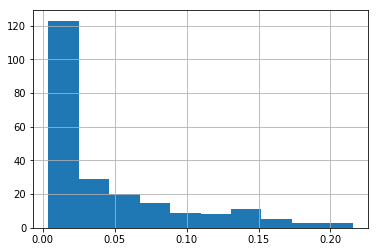

In [259]:
training_df.Salary.hist()

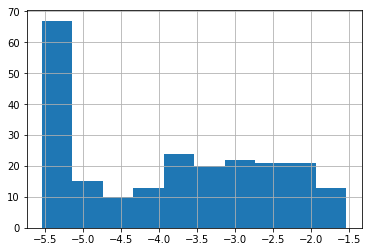

In [260]:
training_df['log_salary'] = np.log(training_df.Salary)

training_df.log_salary.hist()

In [261]:
from scipy import stats

y_transformed, _ = stats.boxcox(training_df.Salary)

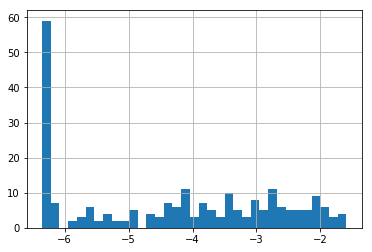

In [262]:
pd.Series(y_transformed).hist(bins=35)

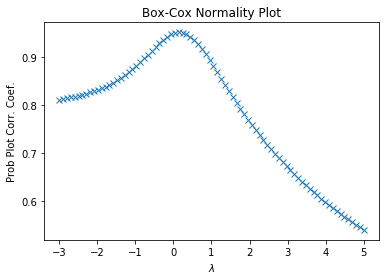

In [263]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(training_df.Salary, -3, 5, plot=ax)

0.14784361834198476


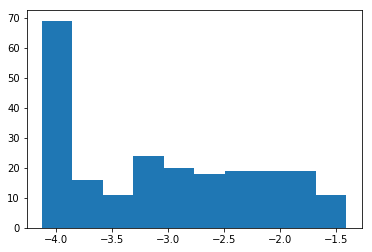

In [327]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
training_df['y_t']=(np.power(training_df.Salary,0.1124)-1)/0.1124

plt.hist(training_df['y_t']);

In [265]:
training_df.loc[:,'rootASC'] = training_df.loc[:,'All_star_count'] ** 0.5

In [266]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,log_salary,rootASC
Runs,1.000000,0.952173,0.923689,0.534445,0.778922,0.898578,0.350185,0.409411,0.302935,0.381748,...,0.166154,0.062447,-0.026200,-0.022210,0.038493,0.026555,0.018653,0.115282,0.686888,0.648360
Hits,0.952173,1.000000,0.953319,0.518894,0.695744,0.887244,0.439449,0.372047,0.236696,0.316797,...,0.158003,0.090262,-0.003374,0.012330,-0.015730,-0.010905,-0.037018,0.112292,0.749587,0.665536
Doubles,0.923689,0.953319,1.000000,0.438279,0.722164,0.892131,0.401839,0.364893,0.296375,0.360820,...,0.200161,0.056483,0.035607,-0.028224,-0.004203,0.008805,-0.058884,0.092906,0.719231,0.650526
Triples,0.534445,0.518894,0.438279,1.000000,0.156718,0.301317,0.257260,0.083197,0.002540,0.031526,...,-0.132893,0.157634,-0.076292,0.145599,0.113319,0.060312,0.168163,-0.107120,0.243669,0.175120
HR,0.778922,0.695744,0.722164,0.156718,1.000000,0.920733,0.146941,0.295741,0.552852,0.536374,...,0.281214,-0.128821,0.046325,-0.144090,0.075979,0.014645,-0.128567,0.284094,0.535465,0.562779
RBI,0.898578,0.887244,0.892131,0.301317,0.920733,1.000000,0.304571,0.369451,0.436678,0.471908,...,0.265545,-0.054666,0.042297,-0.088507,0.026379,0.000203,-0.125406,0.215143,0.692217,0.661079
BA,0.350185,0.439449,0.401839,0.257260,0.146941,0.304571,1.000000,0.614734,0.526902,0.629407,...,0.094833,0.167672,0.040825,-0.053416,-0.055458,-0.048196,-0.045847,0.013914,0.285767,0.350417
OBP,0.409411,0.372047,0.364893,0.083197,0.295741,0.369451,0.614734,1.000000,0.478454,0.728421,...,0.186550,0.013547,-0.018528,-0.083495,-0.023447,-0.033862,-0.080758,0.040363,0.300148,0.367322
SLG,0.302935,0.236696,0.296375,0.002540,0.552852,0.436678,0.526902,0.478454,1.000000,0.950137,...,0.251902,-0.129952,0.095717,-0.185062,0.069457,0.006337,-0.101507,0.213761,0.142038,0.280624
OPS,0.381748,0.316797,0.360820,0.031526,0.536374,0.471908,0.629407,0.728421,0.950137,1.000000,...,0.262788,-0.096582,0.068102,-0.174042,0.045866,-0.007080,-0.107877,0.181116,0.217410,0.349394


In [267]:
training_df['Team'].unique()

array(['LAA', 'COL', 'MIA', 'BAL', 'SDP', 'ATL', 'LAD', 'PIT', 'STL',
       'KCR', 'TBR', 'TOR', 'CHC', 'CLE', 'NYY', 'HOU', 'CHW', 'MIN',
       'ARI', 'TEX', 'SFG', 'MIL', 'DET', 'OAK', 'BOS', 'NYM', 'TOT',
       'WSN', 'CIN', 'SEA', 'PHI'], dtype=object)

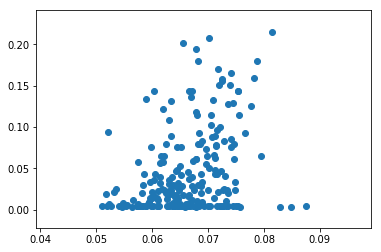

In [268]:
plt.scatter(training_df['BA'], training_df['Salary'])

In [271]:
#sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [272]:
training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Team,log_salary,rootASC
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,0.133193,0.111931,0.112819,0.106501,0.095193,0.100086,0.068520,0.068197,0.067731,0.068090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,LAA,-2.538139,0.305038
DJ LeMahieu,0.076885,0.084963,0.062624,0.106501,0.022793,0.055134,0.074695,0.069200,0.059724,0.063960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,COL,-2.795968,0.305038
Cameron Maybin,0.069777,0.063892,0.052585,0.095484,0.028826,0.046489,0.062146,0.063684,0.054552,0.058627,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MIA,-3.757379,0.000000
Manny Machado,0.095592,0.097207,0.098159,0.038561,0.107930,0.090993,0.070525,0.066237,0.072768,0.070113,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BAL,-2.163445,0.373594
Carlos Asuaje,0.019642,0.029771,0.026771,0.012854,0.009385,0.015464,0.060944,0.058723,0.050665,0.054266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,SDP,-5.533689,0.000000
Ozzie Albies,0.044522,0.041950,0.030117,0.128536,0.028156,0.037652,0.072751,0.072373,0.070770,0.071627,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ATL,-5.524821,0.000000
Kike Hernandez,0.035356,0.033323,0.041829,0.044988,0.032848,0.030593,0.061121,0.064274,0.064241,0.064404,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,LAD,-4.466030,0.000000
Francisco Cervelli,0.033111,0.036344,0.029639,0.033052,0.014748,0.028816,0.059819,0.077685,0.053625,0.064152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PIT,-2.584659,0.000000
Tommy Pham,0.048778,0.036030,0.030117,0.044988,0.043407,0.036308,0.050970,0.055315,0.055752,0.055692,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,STL,-5.497978,0.000000


In [273]:
X2=patsy.dmatrix('Team',data=training_df,return_type='dataframe')
X2.head()

,Intercept,Team[T.ATL],Team[T.BAL],Team[T.BOS],Team[T.CHC],Team[T.CHW],Team[T.CIN],Team[T.CLE],Team[T.COL],Team[T.DET],...,Team[T.PIT],Team[T.SDP],Team[T.SEA],Team[T.SFG],Team[T.STL],Team[T.TBR],Team[T.TEX],Team[T.TOR],Team[T.TOT],Team[T.WSN]
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DJ LeMahieu,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cameron Maybin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Manny Machado,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carlos Asuaje,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
training_df=training_df.join(X2)

In [275]:
training_df['LAA'] = training_df['Team[T.LAA]']
training_df['LAD'] = training_df['Team[T.LAD]']
training_df['PIT'] = training_df['Team[T.PIT]']
training_df['SDP'] = training_df['Team[T.SDP]']
training_df['STL'] = training_df['Team[T.STL]']
training_df['TBR'] = training_df['Team[T.TBR]']
training_df['TOR'] = training_df['Team[T.TOR]']
training_df['WSN'] = training_df['Team[T.WSN]']
training_df['SFG'] = training_df['Team[T.SFG]']
training_df['DET'] = training_df['Team[T.DET]']
training_df['NYM'] = training_df['Team[T.NYM]']
training_df['MIA'] = training_df['Team[T.MIA]']


training_df = training_df.drop(['Team[T.LAA]','Team[T.LAD]','Team[T.PIT]',
                                        'Team[T.SDP]','Team[T.STL]','Team[T.TBR]',
                                        'Team[T.TOR]','Team[T.WSN]','Team[T.SFG]',
                                        'Team[T.DET]','Team[T.NYM]','Team[T.MIA]'],1)

In [276]:
training_df['ATL'] = training_df['Team[T.ATL]']
training_df['BAL'] = training_df['Team[T.BAL]']
training_df['BOS'] = training_df['Team[T.BOS]']
training_df['CHC'] = training_df['Team[T.CHC]']
training_df['CHW'] = training_df['Team[T.CHW]']
training_df['CIN'] = training_df['Team[T.CIN]']
training_df['CLE'] = training_df['Team[T.CLE]']
training_df['COL'] = training_df['Team[T.COL]']
training_df['HOU'] = training_df['Team[T.HOU]']
training_df['KCR'] = training_df['Team[T.KCR]']
training_df['MIL'] = training_df['Team[T.MIL]']
training_df['MIN'] = training_df['Team[T.MIN]']
training_df['NYY'] = training_df['Team[T.NYY]']
training_df['OAK'] = training_df['Team[T.OAK]']
training_df['PHI'] = training_df['Team[T.PHI]']
training_df['SEA'] = training_df['Team[T.SEA]']
training_df['TEX'] = training_df['Team[T.TEX]']
training_df['TOT'] = training_df['Team[T.TOT]']


training_df = training_df.drop(['Team[T.ATL]','Team[T.BAL]','Team[T.BOS]',
                                        'Team[T.CHC]','Team[T.CHW]','Team[T.CIN]',
                                        'Team[T.CLE]','Team[T.COL]','Team[T.HOU]',
                                        'Team[T.KCR]','Team[T.MIL]','Team[T.MIN]',
                                        'Team[T.NYY]','Team[T.OAK]','Team[T.PHI]',
                                        'Team[T.SEA]','Team[T.TEX]','Team[T.TOT]',
                                        'Team', 'Intercept'],1)

In [277]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,HOU,KCR,MIL,MIN,NYY,OAK,PHI,SEA,TEX,TOT
Runs,1.000000,0.952173,0.923689,0.534445,0.778922,0.898578,0.350185,0.409411,0.302935,0.381748,...,-0.028858,0.007631,0.068250,-0.021534,0.029546,-0.074298,-0.048933,0.046542,0.058173,-0.054572
Hits,0.952173,1.000000,0.953319,0.518894,0.695744,0.887244,0.439449,0.372047,0.236696,0.316797,...,-0.002567,0.049337,0.058944,-0.031697,-0.025980,-0.078263,-0.067533,0.048665,0.010544,-0.046035
Doubles,0.923689,0.953319,1.000000,0.438279,0.722164,0.892131,0.401839,0.364893,0.296375,0.360820,...,-0.004931,0.058815,0.057442,-0.027312,-0.039843,-0.035130,-0.058034,0.008216,-0.019098,-0.068416
Triples,0.534445,0.518894,0.438279,1.000000,0.156718,0.301317,0.257260,0.083197,0.002540,0.031526,...,-0.074484,0.006484,0.063709,0.033460,0.036299,-0.068422,-0.087865,-0.021289,0.085748,-0.035857
HR,0.778922,0.695744,0.722164,0.156718,1.000000,0.920733,0.146941,0.295741,0.552852,0.536374,...,0.011917,-0.014153,0.061431,-0.016139,0.078168,-0.004512,-0.016789,0.063017,-0.006949,-0.093632
RBI,0.898578,0.887244,0.892131,0.301317,0.920733,1.000000,0.304571,0.369451,0.436678,0.471908,...,-0.001379,0.015498,0.047722,-0.019117,0.021750,-0.032825,-0.047315,0.036754,-0.019920,-0.075907
BA,0.350185,0.439449,0.401839,0.257260,0.146941,0.304571,1.000000,0.614734,0.526902,0.629407,...,0.019333,-0.032680,0.031361,-0.071418,-0.028496,-0.076569,-0.096145,-0.025633,-0.100030,-0.098399
OBP,0.409411,0.372047,0.364893,0.083197,0.295741,0.369451,0.614734,1.000000,0.478454,0.728421,...,-0.055904,-0.076222,0.010385,-0.008704,0.054527,-0.052050,0.091331,-0.032060,-0.045941,-0.076094
SLG,0.302935,0.236696,0.296375,0.002540,0.552852,0.436678,0.526902,0.478454,1.000000,0.950137,...,0.037090,-0.042441,0.033923,-0.033601,0.097301,0.005444,-0.038293,-0.048017,-0.072014,-0.135914
OPS,0.381748,0.316797,0.360820,0.031526,0.536374,0.471908,0.629407,0.728421,0.950137,1.000000,...,0.009086,-0.060181,0.030155,-0.029308,0.095280,-0.014236,0.002556,-0.048849,-0.072502,-0.133067


In [278]:
## NORMALIZE NON-CATEGORICAL VALUES

In [279]:
residuals_df = training_df[['log_salary', 'OPS', 'RBI', 'SB','TB','Age','Total_games_played','dWAR',
                       'Catcher','First_Base','Second_Base','Third_Base','Shortstop','Left_Field',
                       'Center_Field','Right_Field','Center_Field','DH','rootASC']]

In [328]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + Doubles + Triples + HR + RBI + BA + OBP +'
                       'SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + LAA + LAD + PIT + SDP + STL +'
                       'TBR + TOR + WSN + SFG + DET + NYM + MIA + ATL + BAL + BOS + CHC + CHW + CIN +'
                       'CLE + COL + HOU + KCR + MIL + MIN + NYY + OAK + PHI + SEA + TEX + TOT',
                       data=training_df, return_type="dataframe")

model2 = sm.OLS(y, X)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     13.40
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           3.56e-39
Time:                        15:18:47   Log-Likelihood:                -198.37
No. Observations:                 226   AIC:                             504.7
Df Residuals:                     172   BIC:                             689.5
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.6526      0.803     -7.036      0.000      -7.238      -4.067
Runs                  -9.9690     10.553     -0.945      0.346     -30.799      10.861
Hits                  14.9349      8.721      1.712      0.089      -2.280      32.149
Doubles                0.3436      6.538      0.053      0.958     -12.562      13.249
Triples               -0.4654      1.933     -0.241      0.810      -4.281       3.350
HR                     0.9894      5.998      0.165      0.869     -10.851      12.829
RBI                   -6.2315     10.325     -0.604      0.547     -26.612      14.149
BA                     8.6117     15.889      0.542      0.589     -22.751      39.974
OBP                    2.9063     11.567      0.251      0.802     -19.926      25.739
SLG                   -1.5174      7.885     -0.192      0.848     -17.082      14.047
OPS                    0.3917      4.637      0.084      0.933      -8.762       9.545
SB                    -2.2600      1.648     -1.371      0.172      -5.514       0.993
TB                     9.3480      5.343      1.750      0.082      -1.198      19.894
SF                    -1.4916      2.788     -0.535      0.593      -6.995       4.012
Age                    2.3083      9.634      0.240      0.811     -16.708      21.325
Total_games_played    25.1780      3.417      7.369      0.000      18.434      31.922
All_star_count         1.2182      1.277      0.954      0.342      -1.303       3.739
dWAR                   1.2513      1.012      1.236      0.218      -0.747       3.249
Catcher               -0.5475      0.184     -2.977      0.003      -0.911      -0.184
First_Base            -0.5921      0.187     -3.175      0.002      -0.960      -0.224
Second_Base           -0.9668      0.167     -5.806      0.000      -1.295      -0.638
Third_Base            -0.6915      0.153     -4.520      0.000      -0.993      -0.390
Shortstop             -0.9095      0.163     -5.596      0.000      -1.230      -0.589
Left_Field            -0.6053      0.157     -3.867      0.000      -0.914      -0.296
Center_Field          -0.7517      0.193     -3.886      0.000      -1.134      -0.370
Right_Field           -0.4422      0.152     -2.904      0.004      -0.743      -0.142
DH                    -0.1459      0.284     -0.514      0.608      -0.706       0.415
LAA                   -0.3327      0.367     -0.907      0.366      -1.057       0.392
LAD                   -0.2133      0.317     -0.673      0.502      -0.839       0.412
PIT                    0.0409      0.345      0.119      0.906      -0.639       0.721
SDP                   -0.2777      0.358     -0.775      0.439      -0.985       0.430
STL                   -0.3151      0.377     -0.836      0.404      -1.059       0.429
TBR                   -0.3661      0.3

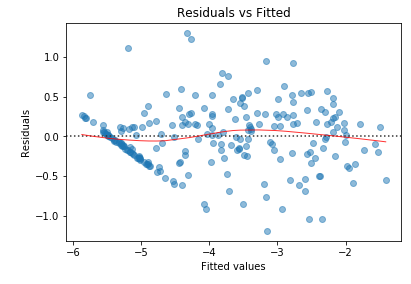

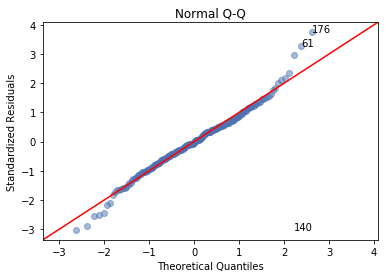

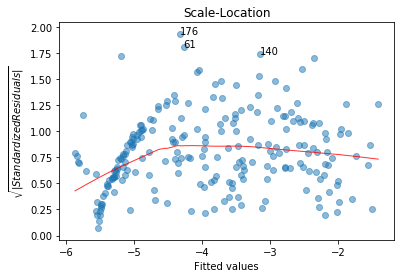

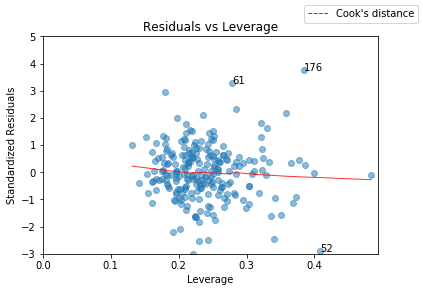

In [329]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit2)

In [330]:
X_exp2 = X.applymap(np.exp)
y_exp2 = y.applymap(np.exp)

In [331]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_exp2, y_exp2, test_size=0.3, random_state=55)

reg2 = LinearRegression()
scores = cross_val_score(reg2, X_exp2, y_exp2, cv=10, scoring='r2')
mse_scores = cross_val_score(reg2, X_exp2, y_exp2, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.2901959184601141
0.0015262609389344337


     test_score  train_score  train_size
0 -5.192574e-01     1.000000          16
1 -1.149805e+17     0.988116          54
2 -1.423415e-01     0.872608          92
3 -2.081037e+00     0.092332         130
4 -1.061280e+00    -0.083030         169


(-1, 1)

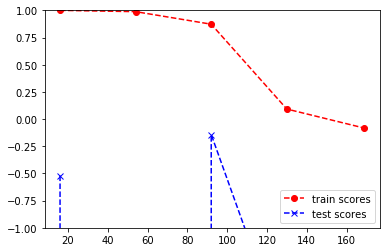

In [332]:
train_sizes, train_scores, test_scores = learning_curve(reg2, X_exp2, y_exp2, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit2, original model with all features against log_salary has mean R^2 value of 0.538 over 10 cross folds,
and a mean MSE score of 0.777 over 10 cross folds.

In [333]:
y, X = patsy.dmatrices('log_salary ~ Hits + Doubles + Triples + HR + RBI + OBP +'
                       'SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + LAA + LAD + PIT + SDP + STL +'
                       'TBR + TOR + WSN + SFG + DET + NYM + MIA + ATL + BAL + BOS + CHC + CHW + CIN +'
                       'CLE + COL + HOU + KCR + MIL + MIN + NYY + OAK + PHI + SEA + TEX + TOT + rootASC',
                       data=training_df, return_type="dataframe")

model3 = sm.OLS(y, X)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     14.41
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           4.21e-41
Time:                        15:18:49   Log-Likelihood:                -194.00
No. Observations:                 226   AIC:                             494.0
Df Residuals:                     173   BIC:                             675.3
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.1039      0.715     -7.136      0.000      -6.515      -3.692
Hits                  10.8362      6.628      1.635      0.104      -2.246      23.919
Doubles                0.4141      6.318      0.066      0.948     -12.057      12.885
Triples               -0.9107      1.866     -0.488      0.626      -4.595       2.773
HR                    -3.9521      4.736     -0.835      0.405     -13.299       5.395
RBI                   -3.3969      9.931     -0.342      0.733     -22.999      16.205
OBP                   -0.4552      9.403     -0.048      0.961     -19.015      18.105
SLG                    2.9577      6.555      0.451      0.652      -9.980      15.895
OPS                    1.4890      2.686      0.554      0.580      -3.812       6.790
SB                    -2.7899      1.407     -1.983      0.049      -5.567      -0.013
TB                     5.5589      3.781      1.470      0.143      -1.905      13.023
SF                    -1.6751      2.725     -0.615      0.540      -7.054       3.704
Age                   -0.2934      9.247     -0.032      0.975     -18.545      17.958
Total_games_played    24.3724      3.252      7.495      0.000      17.954      30.791
All_star_count        -5.6523      2.714     -2.083      0.039     -11.009      -0.296
dWAR                   1.1375      0.983      1.157      0.249      -0.803       3.078
Catcher               -0.4431      0.171     -2.598      0.010      -0.780      -0.106
First_Base            -0.4922      0.180     -2.739      0.007      -0.847      -0.138
Second_Base           -0.9121      0.155     -5.897      0.000      -1.217      -0.607
Third_Base            -0.6240      0.143     -4.353      0.000      -0.907      -0.341
Shortstop             -0.8921      0.156     -5.704      0.000      -1.201      -0.583
Left_Field            -0.6151      0.152     -4.049      0.000      -0.915      -0.315
Center_Field          -0.7625      0.186     -4.101      0.000      -1.129      -0.395
Right_Field           -0.3815      0.147     -2.599      0.010      -0.671      -0.092
DH                     0.0186      0.270      0.069      0.945      -0.514       0.552
LAA                   -0.3663      0.358     -1.024      0.307      -1.072       0.340
LAD                   -0.3440      0.313     -1.098      0.274      -0.963       0.275
PIT                   -0.0250      0.338     -0.074      0.941      -0.691       0.641
SDP                   -0.3390      0.351     -0.967      0.335      -1.031       0.353
STL                   -0.2255      0.369     -0.611      0.542      -0.954       0.503
TBR                   -0.4299      0.373     -1.152      0.251      -1.166       0.307
TOR                   -0.3187      0.344     -0.925      0.356      -0.999       0.361
WSN                   -0.0967      0.3

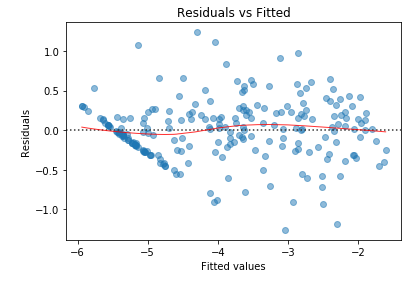

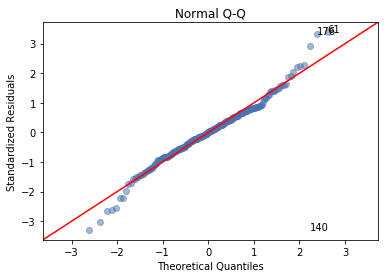

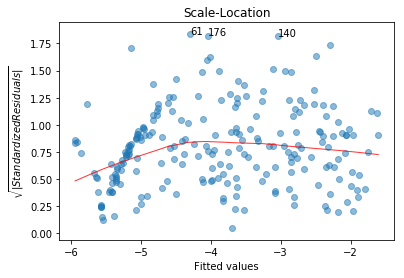

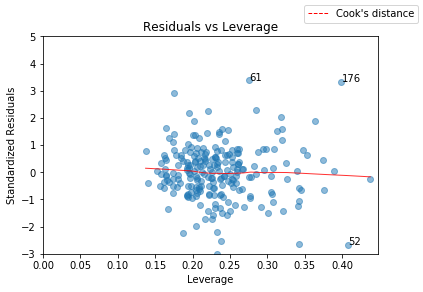

In [334]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit3)

In [335]:
X_exp3 = X.applymap(np.exp)
y_exp3 = y.applymap(np.exp)

In [336]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_exp3, y_exp3, test_size=0.3, random_state=55)

reg3 = LinearRegression()
scores = cross_val_score(reg3, X_exp3, y_exp3, cv=10, scoring='r2')
mse_scores = cross_val_score(reg3, X_exp3, y_exp3, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

-1.6114357576989615
0.0036937775423947885


     test_score  train_score  train_size
0 -8.804694e-01     1.000000          16
1 -3.662384e+20     0.990433          54
2 -3.761888e-01     0.864955          92
3 -2.016255e+00    -0.141599         130
4 -8.879473e-02     0.100132         169


(-1, 1)

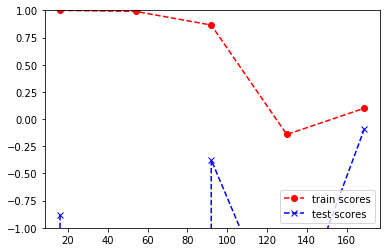

In [337]:
train_sizes, train_scores, test_scores = learning_curve(reg3, X_exp3, y_exp3, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit3, has mean R^2 value of 0.543 over 10 cross folds, and a mean MSE score of 0.717 over 10 cross folds.

In [338]:
y, X = patsy.dmatrices('log_salary ~ Hits + Doubles + RBI + OBP +'
                       'OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + LAA + LAD + PIT + SDP + STL +'
                       'TBR + TOR + WSN + SFG + DET + NYM + MIA + ATL + BOS + CHC + CHW + CIN +'
                       'COL + HOU + KCR + MIL + MIN + NYY + OAK + PHI + TEX + TOT + rootASC',
                       data=training_df, return_type="dataframe")

model4 = sm.OLS(y, X)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     15.72
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           5.08e-43
Time:                        15:18:50   Log-Likelihood:                -195.47
No. Observations:                 226   AIC:                             488.9
Df Residuals:                     177   BIC:                             656.5
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.3348      0.687     -7.762      0.000      -6.691      -3.978
Hits                  19.5195     12.440      1.569      0.118      -5.030      44.069
Doubles                1.8168      6.145      0.296      0.768     -10.310      13.943
RBI                   -2.7158      9.116     -0.298      0.766     -20.705      15.274
OBP                   -0.5184     13.375     -0.039      0.969     -26.913      25.876
OPS                    4.5530     12.136      0.375      0.708     -19.398      28.504
SB                    -2.8074      1.338     -2.099      0.037      -5.447      -0.168
TB                    -9.3651     18.392     -0.509      0.611     -45.661      26.930
SF                    -1.8886      2.656     -0.711      0.478      -7.129       3.352
Age                   -0.5034      9.190     -0.055      0.956     -18.640      17.633
Total_games_played    24.4004      3.220      7.577      0.000      18.045      30.755
All_star_count        -5.2410      2.666     -1.966      0.051     -10.502       0.020
dWAR                   1.1212      0.976      1.148      0.252      -0.806       3.048
Catcher               -0.4790      0.167     -2.870      0.005      -0.808      -0.150
First_Base            -0.5022      0.178     -2.822      0.005      -0.853      -0.151
Second_Base           -0.9393      0.150     -6.257      0.000      -1.236      -0.643
Third_Base            -0.6376      0.141     -4.507      0.000      -0.917      -0.358
Shortstop             -0.9353      0.151     -6.192      0.000      -1.233      -0.637
Left_Field            -0.6457      0.148     -4.377      0.000      -0.937      -0.355
Center_Field          -0.7754      0.184     -4.210      0.000      -1.139      -0.412
Right_Field           -0.4118      0.144     -2.862      0.005      -0.696      -0.128
DH                    -0.0085      0.264     -0.032      0.974      -0.529       0.512
LAA                   -0.0969      0.287     -0.338      0.736      -0.663       0.469
LAD                   -0.0815      0.242     -0.336      0.737      -0.560       0.397
PIT                    0.2278      0.280      0.814      0.417      -0.324       0.780
SDP                   -0.0702      0.282     -0.249      0.804      -0.627       0.486
STL                    0.0381      0.306      0.124      0.901      -0.567       0.643
TBR                   -0.1554      0.309     -0.503      0.615      -0.765       0.454
TOR                   -0.0441      0.269     -0.164      0.870      -0.576       0.488
WSN                    0.1634      0.282      0.580      0.562      -0.392       0.719
SFG                    0.1262      0.289      0.437      0.662      -0.443       0.696
DET                   -0.0026      0.289     -0.009      0.993      -0.573       0.568
NYM                   -0.1056      0.2

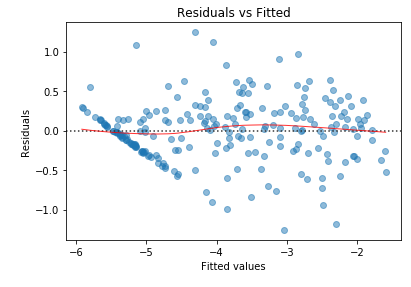

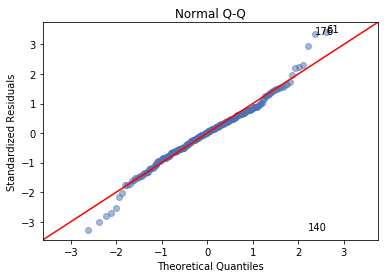

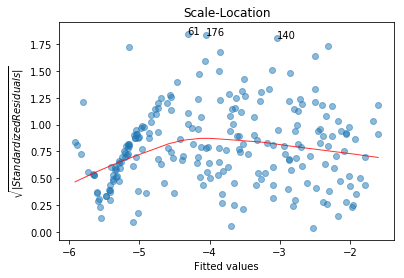

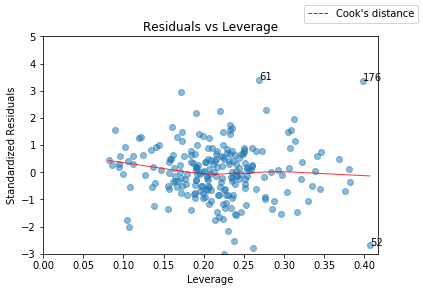

In [339]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit4)

In [340]:
X_exp4 = X.applymap(np.exp)
y_exp4 = y.applymap(np.exp)

In [341]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_exp4, y_exp4, test_size=0.3, random_state=55)

reg4 = LinearRegression()
scores = cross_val_score(reg4, X_exp4, y_exp4, cv=10, scoring='r2')
mse_scores = cross_val_score(reg4, X_exp4, y_exp4, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

-0.006202404405675354
0.0023242979800251512


     test_score  train_score  train_size
0 -1.040116e+00     1.000000          16
1 -3.691077e+23     0.958954          54
2  7.042924e-03     0.847242          92
3 -2.388425e+00    -0.315085         130
4 -8.688874e-01    -0.401896         169


(-1, 1)

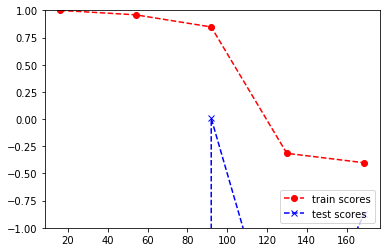

In [342]:
train_sizes, train_scores, test_scores = learning_curve(reg4, X_exp4, y_exp4, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit4, has mean R^2 value of 0.653 over 10 cross folds, and a mean MSE score of 0.600 over 10 cross folds.

In [343]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + Doubles + Triples + HR + RBI + BA + OBP +'
                       'SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH',
                       data=training_df, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     31.86
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           8.31e-55
Time:                        15:18:51   Log-Likelihood:                -210.01
No. Observations:                 226   AIC:                             468.0
Df Residuals:                     202   BIC:                             550.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.0718      0.708     -8.579      0.000      -7.467      -4.676
Runs                  -8.9335      9.042     -0.988      0.324     -26.763       8.896
Hits                  14.6455      7.496      1.954      0.052      -0.135      29.426
Doubles                0.5240      5.728      0.091      0.927     -10.771      11.819
Triples               -0.3787      1.676     -0.226      0.821      -3.684       2.927
HR                     1.0869      5.270      0.206      0.837      -9.304      11.478
RBI                   -6.4841      9.130     -0.710      0.478     -24.486      11.518
BA                     9.7571     14.411      0.677      0.499     -18.659      38.173
OBP                    5.2154     10.179      0.512      0.609     -14.855      25.286
SLG                   -3.0607      7.311     -0.419      0.676     -17.477      11.356
OPS                    0.5104      4.294      0.119      0.905      -7.956       8.977
SB                    -1.7862      1.451     -1.231      0.220      -4.648       1.076
TB                     9.2229      4.545      2.029      0.044       0.261      18.185
SF                    -1.4187      2.504     -0.567      0.572      -6.357       3.519
Age                    2.9750      8.604      0.346      0.730     -13.991      19.941
Total_games_played    24.6144      3.163      7.783      0.000      18.378      30.850
All_star_count         1.0052      1.171      0.859      0.392      -1.303       3.314
dWAR                   0.9550      0.891      1.072      0.285      -0.802       2.712
Catcher               -0.5433      0.168     -3.231      0.001      -0.875      -0.212
First_Base            -0.6450      0.168     -3.843      0.000      -0.976      -0.314
Second_Base           -0.9684      0.150     -6.453      0.000      -1.264      -0.673
Third_Base            -0.7354      0.144     -5.106      0.000      -1.019      -0.451
Shortstop             -0.9883      0.147     -6.709      0.000      -1.279      -0.698
Left_Field            -0.6815      0.143     -4.772      0.000      -0.963      -0.400
Center_Field          -0.8250      0.174     -4.741      0.000      -1.168      -0.482
Right_Field           -0.5114      0.142     -3.596      0.000      -0.792      -0.231
DH                    -0.1736      0.245     -0.707      0.480      -0.658       0.310
==============================================================================
Omnibus:                        5.449   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                7.712
Skew:                           0.073   Prob(JB):                       0.0211
Kurtosis:                       3.893   Cond. No.                     1.08e+16
==============================================================================

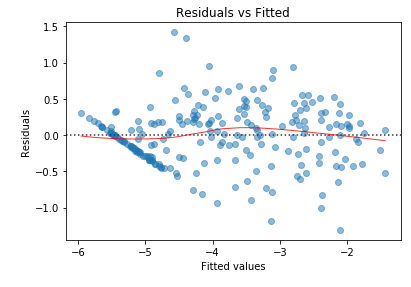

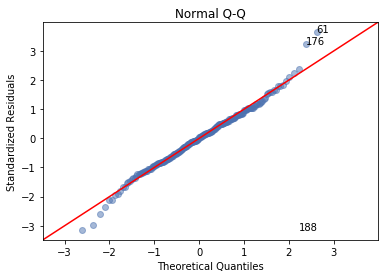

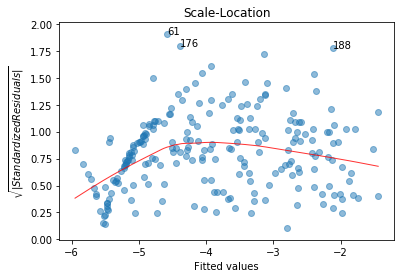

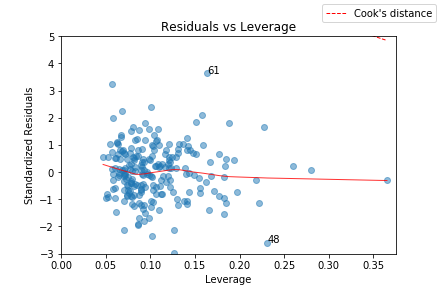

In [344]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit)

In [345]:
X_exp = X.applymap(np.exp)
y_exp = y.applymap(np.exp)

In [346]:
y

,log_salary
Player_Name,
Ian Kinsler,-2.538139
DJ LeMahieu,-2.795968
Cameron Maybin,-3.757379
Manny Machado,-2.163445
Carlos Asuaje,-5.533689
Ozzie Albies,-5.524821
Kike Hernandez,-4.466030
Francisco Cervelli,-2.584659
Tommy Pham,-5.497978


In [347]:
y_exp

,log_salary
Player_Name,
Ian Kinsler,0.079013
DJ LeMahieu,0.061056
Cameron Maybin,0.023345
Manny Machado,0.114928
Carlos Asuaje,0.003951
Ozzie Albies,0.003987
Kike Hernandez,0.011493
Francisco Cervelli,0.075422
Tommy Pham,0.004095


In [348]:
X_train, X_test, y_train, y_test = train_test_split(X_exp, y_exp, test_size=0.3, random_state=55)

reg = LinearRegression()
scores = cross_val_score(reg, X_exp, y_exp, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_exp, y_exp, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.4044934446918066
0.0012692410877368895


     test_score  train_score  train_size
0 -3.434913e+00     1.000000          16
1 -2.576953e+22     0.841003          54
2  3.649371e-01     0.757295          92
3  1.924945e-02     0.497738         130
4  4.437034e-02     0.409822         169


(-1, 1)

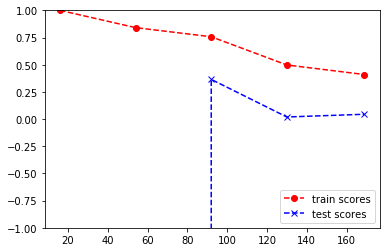

In [349]:
train_sizes, train_scores, test_scores = learning_curve(reg, X_exp, y_exp, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [350]:
y, X = patsy.dmatrices('y_t ~ OPS + RBI + '
                       'SB + TB + Age + Total_games_played + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + rootASC',
                       data=training_df, return_type="dataframe")

model5 = sm.OLS(y, X)
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     46.29
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.26e-59
Time:                        15:18:53   Log-Likelihood:                -116.26
No. Observations:                 226   AIC:                             266.5
Df Residuals:                     209   BIC:                             324.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.1707      0.403    -10.343      0.000      -4.966      -3.376
OPS                    2.7122      4.764      0.569      0.570      -6.679      12.103
RBI                   -8.8253      4.292     -2.056      0.041     -17.287      -0.363
SB                    -1.5180      0.790     -1.921      0.056      -3.076       0.040
TB                    13.2870      4.961      2.678      0.008       3.508      23.066
Age                    3.0903      5.445      0.568      0.571      -7.643      13.824
Total_games_played    15.5651      1.937      8.035      0.000      11.746      19.384
dWAR                   0.5468      0.559      0.977      0.329      -0.556       1.650
Catcher               -0.3597      0.098     -3.688      0.000      -0.552      -0.167
First_Base            -0.4122      0.107     -3.869      0.000      -0.622      -0.202
Second_Base           -0.6487      0.090     -7.213      0.000      -0.826      -0.471
Third_Base            -0.4883      0.089     -5.480      0.000      -0.664      -0.313
Shortstop             -0.6416      0.089     -7.189      0.000      -0.817      -0.466
Left_Field            -0.5191      0.089     -5.829      0.000      -0.695      -0.344
Center_Field          -0.6073      0.110     -5.523      0.000      -0.824      -0.391
Right_Field           -0.3759      0.089     -4.230      0.000      -0.551      -0.201
DH                    -0.1178      0.153     -0.770      0.442      -0.420       0.184
rootASC                0.7872      0.292      2.698      0.008       0.212       1.362
==============================================================================
Omnibus:                        6.547   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.093
Skew:                          -0.090   Prob(JB):                      0.00643
Kurtosis:                       4.020   Cond. No.                     6.54e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

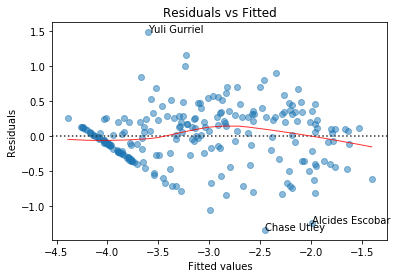

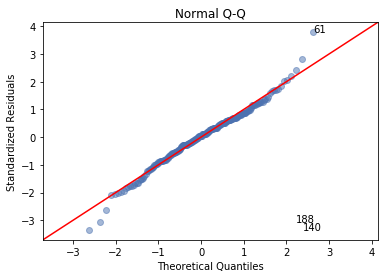

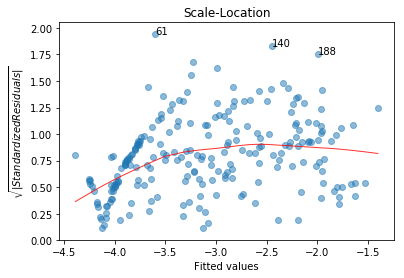

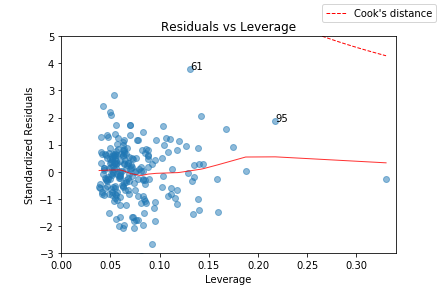

In [351]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit5)

In [352]:
X_exp5 = X.applymap(np.exp)
y_exp5 = y.applymap(np.exp)

In [353]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_exp5, y_exp5, test_size=0.3, random_state=55)

reg5 = LinearRegression()
scores = cross_val_score(reg5, X_exp5, y_exp5, cv=10, scoring='r2')
mse_scores = cross_val_score(reg5, X_exp5, y_exp5, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.5797854902197273
0.001182068626538363


     test_score  train_score  train_size
0 -1.386861e+01     0.973459          16
1 -1.620056e+16     0.807227          54
2  5.381042e-01     0.728499          92
3  5.243971e-01     0.691154         130
4  5.949450e-01     0.688668         169


(-1, 1)

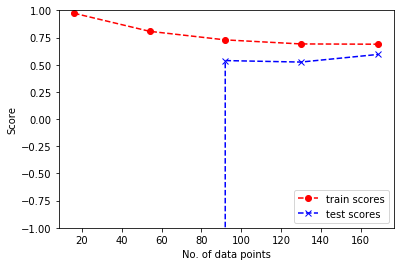

In [354]:
train_sizes, train_scores, test_scores = learning_curve(reg5, X_exp5, y_exp5, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit5, has mean R^2 value of 0.717 over 10 cross folds, and a mean MSE score of 0.533 over 10 cross folds.

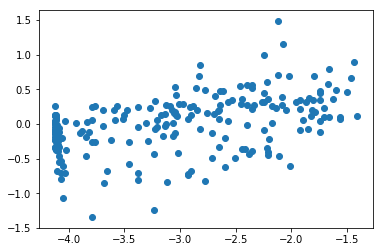

In [355]:
plt.scatter(y.values,fit5.resid)

In [356]:
## DONT CHANGE -- POTENTIAL FINAL MODEL

y, X = patsy.dmatrices('y_t ~ OPS + RBI + '
                       'TB + Total_games_played +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + rootASC',
                       data=training_df, return_type="dataframe")

model6 = sm.OLS(y, X)
fit6 = model6.fit()
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     56.17
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           3.03e-61
Time:                        15:18:54   Log-Likelihood:                -118.75
No. Observations:                 226   AIC:                             265.5
Df Residuals:                     212   BIC:                             313.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.9724      0.279    -14.218      0.000      -4.523      -3.422
OPS                    1.9696      4.765      0.413      0.680      -7.424      11.363
RBI                   -5.1687      3.799     -1.361      0.175     -12.656       2.319
TB                     8.8695      4.299      2.063      0.040       0.395      17.344
Total_games_played    15.9392      1.410     11.308      0.000      13.161      18.718
Catcher               -0.2863      0.081     -3.522      0.001      -0.446      -0.126
First_Base            -0.3946      0.096     -4.126      0.000      -0.583      -0.206
Second_Base           -0.6284      0.084     -7.463      0.000      -0.794      -0.462
Third_Base            -0.4373      0.084     -5.211      0.000      -0.603      -0.272
Shortstop             -0.6106      0.083     -7.375      0.000      -0.774      -0.447
Left_Field            -0.5143      0.080     -6.467      0.000      -0.671      -0.358
Center_Field          -0.6247      0.098     -6.406      0.000      -0.817      -0.432
Right_Field           -0.3720      0.087     -4.261      0.000      -0.544      -0.200
DH                    -0.1043      0.139     -0.752      0.453      -0.378       0.169
rootASC                0.7995      0.290      2.754      0.006       0.227       1.372
==============================================================================
Omnibus:                        6.480   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                9.958
Skew:                          -0.087   Prob(JB):                      0.00688
Kurtosis:                       4.013   Cond. No.                     6.72e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

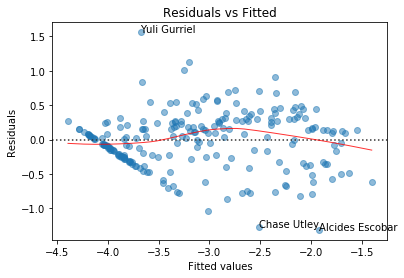

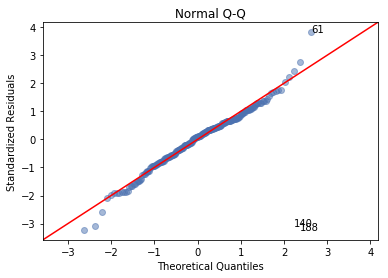

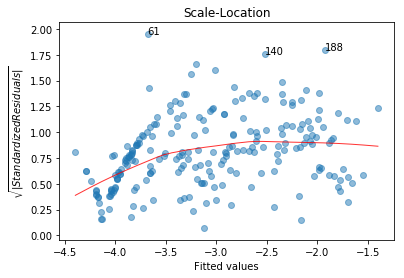

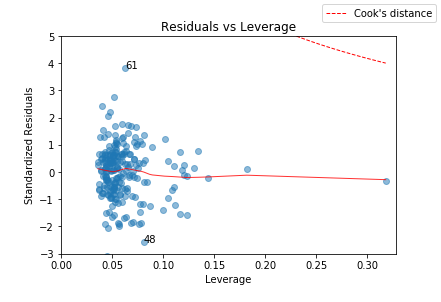

In [357]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'y_t', axis=1), training_df['y_t'], fit6)

In [358]:
X_exp6 = X.applymap(np.exp)
y_exp6 = y.applymap(np.exp)

In [359]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_exp6, y_exp6, test_size=0.3, random_state=55)

reg6 = LinearRegression()
scores = cross_val_score(reg6, X_exp6, y_exp6, cv=10, scoring='r2')
mse_scores = cross_val_score(reg6, X_exp6, y_exp6, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.5858133096866077
0.0011666253699183552


     test_score  train_score  train_size
0 -3.829337e+27     0.878623          16
1 -1.745778e+17     0.767940          54
2  5.707048e-01     0.721311          92
3  5.487427e-01     0.682532         130
4  6.128182e-01     0.699321         169


(-1, 1)

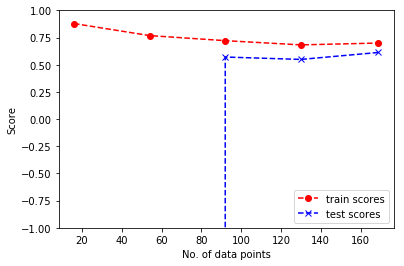

In [360]:
train_sizes, train_scores, test_scores = learning_curve(reg6, X_exp6, y_exp6, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

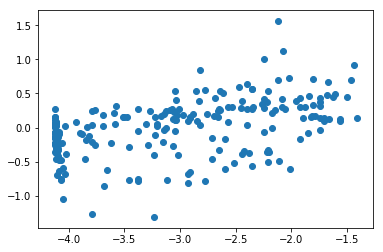

In [361]:
plt.scatter(y.values,fit6.resid)

In [362]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, Ian Kinsler to Pat Valaika
Data columns (total 60 columns):
Runs                  226 non-null float64
Hits                  226 non-null float64
Doubles               226 non-null float64
Triples               226 non-null float64
HR                    226 non-null float64
RBI                   226 non-null float64
BA                    226 non-null float64
OBP                   226 non-null float64
SLG                   226 non-null float64
OPS                   226 non-null float64
SB                    226 non-null float64
TB                    226 non-null float64
SF                    226 non-null float64
Salary                226 non-null float64
Age                   226 non-null float64
Total_games_played    226 non-null float64
dWAR                  226 non-null float64
All_star_count        226 non-null float64
Catcher               226 non-null float64
First_Base            226 non-null float64
Second_Base           